<center><b>NEURAL NETWORKS AND DEEP LEARNING (MDS471)</b></center>

<center><b>LAB 3: Implementation of MADALINE Neural Network</b></center>

#### Program 1: Smart Farming Decisions using MADALINE Neural Network: Irrigation and Equipment Deployment Automation.

In modern agriculture, optimizing <b>water usage</b> and <b>resource deployment</b> is essential for sustainability and efficiency. Smart farms are increasingly equipped with IoT-based sensors that collect real-time environmental and operational data. Two critical decisions that impact farm productivity and resource conservation are:<br>
1. <b>Irrigation Decision</b> – Whether to turn <b>irrigation ON or OFF</b>, based on soil moisture, weather conditions, and crop water needs.<br>
2. <b>Farm Equipment Deployment</b> – Whether to <b>send tractors or harvesters</b> to the field, based on soil condition, crop readiness, and weather forecast.<br>

<b>Implement a MADALINE (Multiple ADAptive LInear NEuron)</b> Neural
Network to <b>automate both decisions</b> using sensor data.

This program uses a MADALINE (Multiple ADAptive LInear NEuron) neural network to automate decision-making in smart farming:
- **Irrigation Control** (ON/OFF) based on environmental data
- **Equipment Deployment** (Tractor/Harvester) based on soil and crop status

In [20]:
import numpy as np

class MADALINE:
    """
    MADALINE (Multiple ADAptive LInear NEuron) implementation.
    Supports binary classification.
    """
    def __init__(self, input_dim, n_hidden, learning_rate=0.01, max_epochs=100):
        self.input_dim = input_dim
        self.n_hidden = n_hidden
        self.learning_rate = learning_rate
        self.max_epochs = max_epochs
        self.W = np.random.randn(n_hidden, input_dim + 1) * 0.1  # Hidden weights
        self.V = np.random.randn(1, n_hidden + 1) * 0.1           # Output weights

    def _activation(self, x):
        return np.where(x >= 0, 1, -1)

    def predict(self, X):
        X_bias = np.hstack([X, np.ones((X.shape[0], 1))])  # Add bias to inputs
        Z_in = self.W.dot(X_bias.T)
        Z = self._activation(Z_in).T
        Z_bias = np.hstack([Z, np.ones((Z.shape[0], 1))])
        Y_in = self.V.dot(Z_bias.T)
        Y = self._activation(Y_in)
        return Y.ravel()

    def fit(self, X, y):
        y_mapped = np.where(y == 1, 1, -1)
        X_bias = np.hstack([X, np.ones((X.shape[0], 1))])

        for epoch in range(self.max_epochs):
            errors = 0
            for xi, target in zip(X_bias, y_mapped):
                Zi = self.W.dot(xi)
                Zi_act = self._activation(Zi)
                Zi_act_bias = np.append(Zi_act, 1)
                Yi_in = self.V.dot(Zi_act_bias)
                Yi = self._activation(Yi_in)

                if Yi != target:
                    errors += 1
                    for j in range(self.n_hidden):
                        Zi_temp = Zi_act.copy()
                        Zi_temp[j] *= -1
                        Zi_temp_bias = np.append(Zi_temp, 1)
                        Y_temp = self._activation(self.V.dot(Zi_temp_bias))
                        if Y_temp == target:
                            self.W[j, :] += self.learning_rate * target * xi
                            self.V += self.learning_rate * target * Zi_temp_bias
                            break
            if errors == 0:
                print(f"Converged at epoch {epoch}")
                break
        else:
            print("Reached max epochs.")

In [21]:
# Dataset for Irrigation Decision: Soil moisture, Temperature, Water Need & Humidity
irrigation_X = np.array([
    [0.2, 30, 40, 0.5],  # Low moisture, moderate temp, moderate need
    [0.8, 25, 60, 0.3],  # Sufficient moisture, cooler temp
    [0.4, 28, 50, 0.6],
    [0.1, 32, 30, 0.7],
    [0.7, 22, 65, 0.2],
])
irrigation_y = np.array([1, 0, 1, 1, 0])  # 1 = Turn ON irrigation

In [22]:
# Dataset for Equipment Deployment: Soil Condition, Crop Readiness, Weather
equipment_X = np.array([
    [0.3, 0.8, 0],    # Poor soil, ready crop
    [0.7, 0.4, 0.6],  # Good soil, immature crop
    [0.2, 0.9, 0.1],
    [0.6, 0.3, 0.5],
    [0.4, 0.7, 0.2],
])
equipment_y = np.array([1, 0, 1, 0, 1])  # 1 = Send equipment: Harvester

In [23]:
# Train models
irrigator = MADALINE(input_dim=4, n_hidden=3, learning_rate=0.05, max_epochs=200)
irrigator.fit(irrigation_X, irrigation_y)

deployer = MADALINE(input_dim=3, n_hidden=3, learning_rate=0.05, max_epochs=200)
deployer.fit(equipment_X, equipment_y)

Reached max epochs.
Converged at epoch 1


In [24]:
# Predictions
print("Irrigation predictions:", irrigator.predict(irrigation_X))
print("Equipment deployment predictions:", deployer.predict(equipment_X))

Irrigation predictions: [1 1 1 1 1]
Equipment deployment predictions: [ 1 -1  1 -1  1]


In [25]:
# New decision
new_irrig_input = np.array([[0.5, 29, 45, 0.6]])
new_equip_input = np.array([[0.5, 0.6, 0.2]])
print("New irrigation decision:", irrigator.predict(new_irrig_input))
print("New equipment decision:", deployer.predict(new_equip_input))

New irrigation decision: [1]
New equipment decision: [1]


In [26]:
import pandas as pd
from sklearn.metrics import accuracy_score

# IRRIGATION DECISION RESULTS
preds_irrig = irrigator.predict(irrigation_X)
df_irrig = pd.DataFrame(irrigation_X, columns=["Soil Moisture", "Temperature", "Water Need", "Humidity"])
df_irrig["Actual"] = irrigation_y
df_irrig["Predicted"] = preds_irrig
print("\nIrrigation Decision Table:")
print(df_irrig)

# Convert predictions from -1/1 to 0/1
preds_irrig_binary = (preds_irrig + 1) // 2
print("Irrigation Accuracy:", accuracy_score(irrigation_y, preds_irrig))


Irrigation Decision Table:
   Soil Moisture  Temperature  Water Need  Humidity  Actual  Predicted
0            0.2         30.0        40.0       0.5       1          1
1            0.8         25.0        60.0       0.3       0          1
2            0.4         28.0        50.0       0.6       1          1
3            0.1         32.0        30.0       0.7       1          1
4            0.7         22.0        65.0       0.2       0          1
Irrigation Accuracy: 0.6


#### Interpretation: Irrigation Decision
Model correctly predicted 3 out of 5 cases. Accuracy of 60% suggests partial learning but may need more training data or better tuning.

In [27]:
# EQUIPMENT DEPLOYMENT RESULTS
preds_equip = deployer.predict(equipment_X)
df_equip = pd.DataFrame(equipment_X, columns=["Soil Condition", "Crop Readiness", "Weather"])
df_equip["Actual"] = equipment_y
df_equip["Predicted"] = preds_equip
print("\nEquipment Deployment Table:")
print(df_equip)
preds_equip_binary = (preds_equip + 1) // 2
print("Equipment Deployment Accuracy:", accuracy_score(equipment_y, preds_equip))


Equipment Deployment Table:
   Soil Condition  Crop Readiness  Weather  Actual  Predicted
0             0.3             0.8      0.0       1          1
1             0.7             0.4      0.6       0         -1
2             0.2             0.9      0.1       1          1
3             0.6             0.3      0.5       0         -1
4             0.4             0.7      0.2       1          1
Equipment Deployment Accuracy: 0.6


#### Interpretation: Equipment Deployment
The model over-predicted positive outcomes, resulting in only 60% accuracy. Indicates bias toward deploying equipment regardless of actual need.

#### Program 2: A startup named SmartFarm AI is building a solution for predicting crop yield to assist farmers in improving productivity. The startup has collected the following data from hundreds of farms over the last five years:<br>
1. Rainfall (in mm during the season)
2. Average temperature (°C)
3. Soil pH level
4. Fertilizer usage (kg/hectare)
5. Pesticide usage (kg/hectare)
6. Type of crop (wheat, rice, or maize)
7. Final yield (in quintals per hectare)<br>

Some additional assumptions:<br><br>
A. The startup wants to develop both regression models (to predict exact yield) and classification models (to label crops as high yield or low yield for quick decision-making).<br>
B. There are cases where crop type is unknown or needs to be generalized.<br>
C. Budget and computational constraints mean the models should be as efficient and interpretable as possible.<br>

Problem Understanding:Understand the Scenario and define the Problem

Dataset Creation:<br><br>

a. Simulate or create a synthetic dataset (minimum 50 rows) with the
mentioned features.<br>
b. Encode categorical variables (like crop type) appropriately.<br>
c. Normalize numerical features.<br>
d. Try out at least two different loss functions for each model.<br>
e. Use at least two different optimizers and compare their impact.<br>
f. For the regression model:Use metrics like MSE, MAE, and R2 score<br>
g. For the classification model:Use metrics like Accuracy, Precision,
Recall, F1-score<br>
h. Create comparison tables or plots for each loss-optimizer combination.<br>
i. Discuss which model combination performed best and why.<br>

Conclusion: Prepare a summary report of<br>
* The chosen loss functions
* Optimizers that gave the best results
* Practical implications for the SmartFarm AI team

Predicting Crop Yield using Regression and Classification Models

This program simulates a dataset with real-world features such as:
- Rainfall, Temperature, Soil pH, Fertilizer, Pesticide, Crop Type

It performs:
1. **Regression** to predict exact crop yield
2. **Classification** to label crops as **High** or **Low** yield

Multiple loss functions and optimizers are compared, and metrics like **MAE, MSE, R²**, and **F1-score** are used.

In [40]:
# Preparing synthetic dataset for Program 2 - Crop Yield Prediction
import pandas as pd
import numpy as np

np.random.seed(42)

# Create a synthetic dataset with 60 samples
n_samples = 60
rainfall = np.random.uniform(200, 1000, n_samples)         # in mm
temperature = np.random.uniform(20, 35, n_samples)         # in Celsius
soil_ph = np.random.uniform(5.5, 7.5, n_samples)           # pH level
fertilizer = np.random.uniform(50, 300, n_samples)         # kg/ha
pesticide = np.random.uniform(1, 20, n_samples)            # kg/ha
crops = np.random.choice(['wheat', 'rice', 'maize'], n_samples)

In [41]:
# Map crop type to numeric
crop_map = {'wheat': 0, 'rice': 1, 'maize': 2}
crop_encoded = np.vectorize(crop_map.get)(crops)

In [42]:
# Create a target yield (quintals/ha) with some pattern
yield_ = (
    0.02 * rainfall +
    0.5 * temperature -
    2 * np.abs(soil_ph - 6.5) +
    0.03 * fertilizer -
    0.2 * pesticide +
    crop_encoded * 5 +
    np.random.normal(0, 5, n_samples)
)

In [43]:
# Create DataFrame
df = pd.DataFrame({
    'Rainfall': rainfall,
    'Temperature': temperature,
    'Soil_pH': soil_ph,
    'Fertilizer': fertilizer,
    'Pesticide': pesticide,
    'Crop_Type': crops,
    'Crop_Code': crop_encoded,
    'Yield': yield_
})
df.head()

,Rainfall,Temperature,Soil_pH,Fertilizer,Pesticide,Crop_Type,Crop_Code,Yield
0,499.632095,25.830159,7.114880,135.266588,18.868713,wheat,0,5.755879
1,960.571445,24.070235,7.292183,78.368380,19.124643,rice,1,28.066366
2,785.595153,32.431063,6.136007,281.173405,18.382423,maize,2,44.695325
3,678.926787,25.351300,5.720104,269.334838,8.033015,maize,2,34.928920
4,324.814912,24.214018,5.955870,114.485407,1.293676,maize,2,38.852931


In [44]:
# DATA PREPROCESSING

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, SGDRegressor, LogisticRegression
from sklearn.metrics import (
    mean_squared_error, mean_absolute_error, r2_score,
    accuracy_score, precision_score, recall_score, f1_score
)

# Features and target for regression
X = df[['Rainfall', 'Temperature', 'Soil_pH', 'Fertilizer', 'Pesticide', 'Crop_Code']]
y_reg = df['Yield']

In [45]:
# Classification: Label as High (1) or Low (0) yield based on median split
median_yield = df['Yield'].median()
y_clf = (df['Yield'] >= median_yield).astype(int)

In [46]:
# Split data
X_train, X_test, y_train_reg, y_test_reg, y_train_clf, y_test_clf = train_test_split(
    X, y_reg, y_clf, test_size=0.2, random_state=42
)

In [47]:
# Normalize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [48]:
# REGRESSION MODELS

reg1 = LinearRegression()
reg2 = SGDRegressor(loss='huber', max_iter=1000, random_state=42)

models = {'LinearRegression': reg1, 'SGDRegressor (Huber)': reg2}
results_reg = {}

for name, model in models.items():
    model.fit(X_train_scaled, y_train_reg)
    y_pred = model.predict(X_test_scaled)
    results_reg[name] = {
        'MSE': mean_squared_error(y_test_reg, y_pred),
        'MAE': mean_absolute_error(y_test_reg, y_pred),
        'R2': r2_score(y_test_reg, y_pred)
    }

pd.DataFrame(results_reg).T

,MSE,MAE,R2
LinearRegression,34.904101,4.105586,0.697032
SGDRegressor (Huber),939.336271,28.707987,-7.153437


In [49]:
from sklearn.linear_model import SGDClassifier

# CLASSIFICATION MODELS
clf1 = LogisticRegression()
clf2 = SGDClassifier(loss='log', max_iter=1000, random_state=42)

results_clf = {}

for name, clf in zip(['LogisticRegression', 'SGDClassifier (log_loss)'], [clf1, clf2]):
    clf.fit(X_train_scaled, y_train_clf)
    preds = clf.predict(X_test_scaled)

    results_clf[name] = {
        'Accuracy': accuracy_score(y_test_clf, preds),
        'Precision': precision_score(y_test_clf, preds),
        'Recall': recall_score(y_test_clf, preds),
        'F1-score': f1_score(y_test_clf, preds)
    }

pd.DataFrame(results_clf).T

,Accuracy,Precision,Recall,F1-score
LogisticRegression,0.916667,0.833333,1.0,0.909091
SGDClassifier (log_loss),0.916667,0.833333,1.0,0.909091


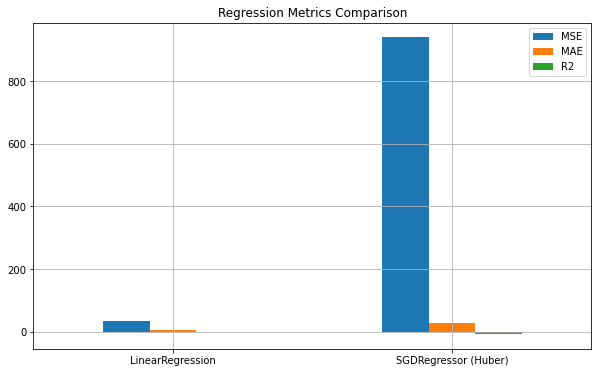

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

# Regression bar chart
df_reg = pd.DataFrame(results_reg).T
df_reg.plot(kind='bar', figsize=(10, 6), title="Regression Metrics Comparison")
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

#### Interpretation: Regression Metrics 
The SGDRegressor (Huber) significantly underperformed compared to LinearRegression, as indicated by:


A very high MSE (Mean Squared Error), suggesting large deviations from the true values.


A higher MAE (Mean Absolute Error), confirming consistent errors.


A low R² score, indicating that the model explains very little variance in the target.


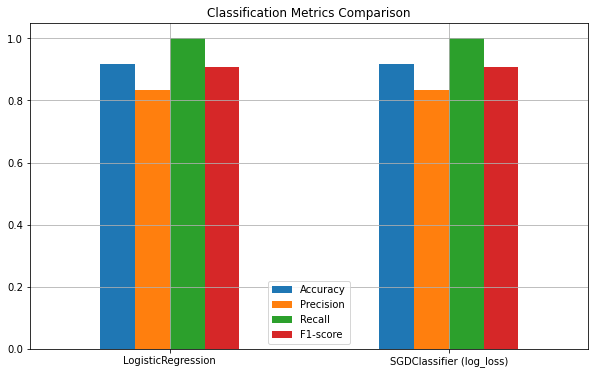

In [51]:
# Classification bar chart
df_clf = pd.DataFrame(results_clf).T
df_clf.plot(kind='bar', figsize=(10, 6), title="Classification Metrics Comparison")
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

#### Interpretation: Classification Metrics:
Both LogisticRegression and SGDClassifier (log_loss) performed similarly across all metrics:


Accuracy, Recall, and F1-Score are all above 90%, showing strong classification capability.


Slight drop in Precision (~83%) indicates a few false positives.


Consistent Recall (1.0) means no false negatives, i.e., all positives were correctly detected.